# Practicum Data Augmentation

## Imports

In [23]:

import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
import torchvision.transforms as T

from torchvision.io import read_image, ImageReadMode
from torchvision.utils import make_grid

plt.rcParams["savefig.bbox"] = 'tight'



## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [ ]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [ ]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

### Opdracht 3: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [5]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

# b. Wat is het relative pad van 'Industrial_1.jpg'?

# c. Bekijk de documentatie van de PyTorch io module

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')
industrialDirectory = '../../01_beeldherkenning/pics/2750/Industrial'
industrial = read_image(industrialDirectory + '/Industrial_1.jpg', mode=ImageReadMode.RGB)

### Opdracht 4: afbeelding tonen

PyTorch Vision maakt ook het tonen van afbeeldingen gemakkelijk.

In [46]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

torch.Size([3, 64, 64])


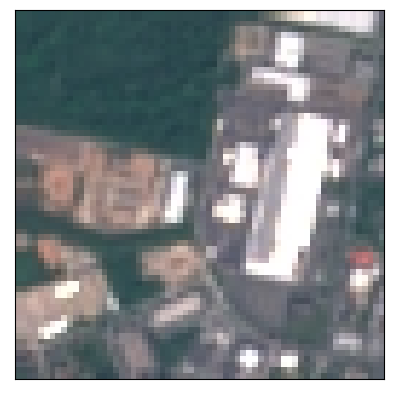

In [48]:
# a. Bekijk het overzicht op https://pytorch.org/vision/stable/index.html

# b. Kun je iets vinden waarmee je een afbeelding kunt tonen?

# c. Toon de afbeelding 'Industrial_1.jpg'

grid = make_grid([industrial])
print(industrial.shape)
show(grid)

### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


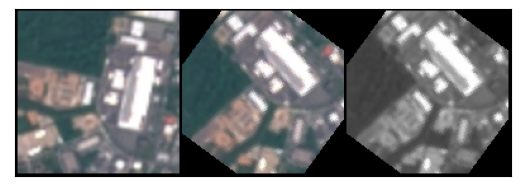

In [50]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?
# torchvision.transforms

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')
industrial_2x = F.resize(industrial, industrial.shape[1]*2)
print(industrial_2x.shape)
# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')

rotater = T.RandomRotation(degrees=(-180, 180))
industrial_2x_rot = rotater(industrial_2x)

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')
industrial_2x_rot_gray = T.Grayscale(3)(industrial_2x_rot)
print(industrial_2x_rot_gray.shape)
# e. Sla de bewerkte afbeeldingen op
transformed_images = [industrial_2x, industrial_2x_rot, industrial_2x_rot_gray]
# f. Toon alle varianten in een grid
grid_transforms = make_grid(transformed_images)
show(grid_transforms)


### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

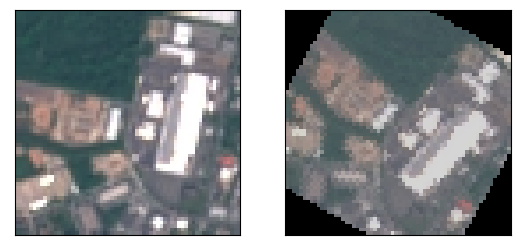

In [53]:
# Extra: Je kunt alle acties ook bundelen, zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie
transform = T.Compose(
    [
        T.ColorJitter(contrast=0.5),
        T.RandomRotation(30),
        T.CenterCrop(64),
    ]
)

new_industrial = transform(industrial)

show([industrial, new_industrial])

### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

In [54]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

import os

industrialDirectory = '../../01_beeldherkenning/pics/2750/Industrial'


filenames = [name for name in os.listdir(industrialDirectory) if os.path.splitext(name)[-1] == '.jpg']

In [55]:
batch_size = len(filenames)
batch = torch.zeros(batch_size, 3, 64, 64, dtype=torch.uint8)

for i, filename in enumerate(filenames):
    batch[i] = read_image(os.path.join(industrialDirectory, filename))

In [56]:
transformed_images = [transform(img) for img in batch]

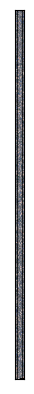

In [61]:
grid = make_grid(transformed_images)
show(grid)